In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns

import src.data.preprocess.exploratory_data_analysis_helpers as helpers
import src.utils.preprocess_text_pipelines as pipelines
from src.data.preprocess.exploratory_data_analysis_helpers import find_most_common_nouns
from src.utils.misc import create_spacy_docs
from src.visualization.visualize_exploratory_data_analysis import format_axis
from src.visualization.visualize_exploratory_data_analysis import rotate_ticks
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

data = pd.read_csv("../../data/benchmark/gold/gold_data_en.csv")
fig_path="../../reports/gold/figures/"

In [2]:
pipelines.normalize(data)
data['normalized_words_removed'] = data['normalized'].apply(lambda text: re.sub("<\w+>", "", text))

@JoeConchaTV @CoryBooker is like a hysterical woman trying to out scream @SenKamalaHarris . I became a conservative years ago when the Democrats treated Clarence Thomas in such a despicable manner . Hope the public is watching this repeat .
@thehill Coulter needs to eat a ham sandwich and choke on it . Such a sexist comment . Plenty of RW men are truly hysterical . Have you seen how the President acts ?
@realDonaldTrump This from the guy who bragged about grabbing you women by the PUSSY ! ! ! STFU you Fat Bloated Lying Piece of SHIT ! You should not have been elected b / c of your speech as well as many more reasons , that your so - called CONSERVATIVE BIBKE BEATERS
My Mather is a slut bitch
In the case of Trump ' s multiple allegations of sexual assault and rape , his followers called the women liars , and threatened them .
can you choke me with your left hand and slap my head with that book and step fucking me on the face with those heels okay thank you
It ’ s hysterical that some1 a

In [3]:
docs = pd.DataFrame(index=range(0, len(data)))
docs['normalized_words_removed'] = create_spacy_docs(data, "normalized_words_removed")
docs['label'] = data['label']

In [4]:
misogynistic = docs.loc[docs.loc[:,'label'] == 1]
non_misogynistic = docs.loc[docs.loc[:,'label'] == 0]

misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(misogynistic['normalized_words_removed']), columns=['Noun', 'Count'])
non_misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(non_misogynistic['normalized_words_removed']), columns=['Noun', 'Count'])

top_10_misogynistic = misogynistic_common_nouns.loc[0:10, :]
top_10_non_misogynistic = non_misogynistic_common_nouns.loc[0:10, :]

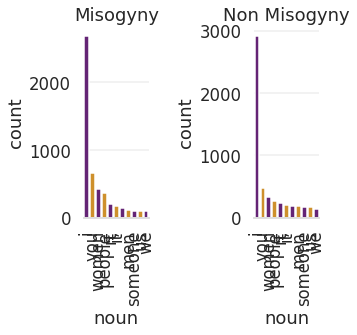

In [11]:
fig, ax = plt.subplots(ncols=2, sharex=True,figsize=(5, 5))

misogynistic = sns.barplot(x=top_10_misogynistic['Noun'], y=top_10_misogynistic['Count'], ax=ax[0], palette=sns.color_palette(["#6C1782", "#E99611"]))
non_misogynistic = sns.barplot(x=top_10_non_misogynistic['Noun'], y=top_10_non_misogynistic['Count'], ax=ax[1], palette=sns.color_palette(["#6C1782", "#E99611"]))

format_axis(ax[0])
ax[0].set_title("Misogyny")

format_axis(ax[1])
ax[1].set_title("Non Misogyny")

rotate_ticks(misogynistic,non_misogynistic)

fig.tight_layout()
plt.savefig(fig_path+"top_10_common_nouns_total_corpus.png")
plt.show()

/home/tcake/coding_projects/python/opt_out/find-out/src/data/preprocess/exploratory_data_analysis_helpers.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  density_of_curse_words_in_sentence
/home/tcake/coding_projects/python/opt_out/find-out/find-out/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


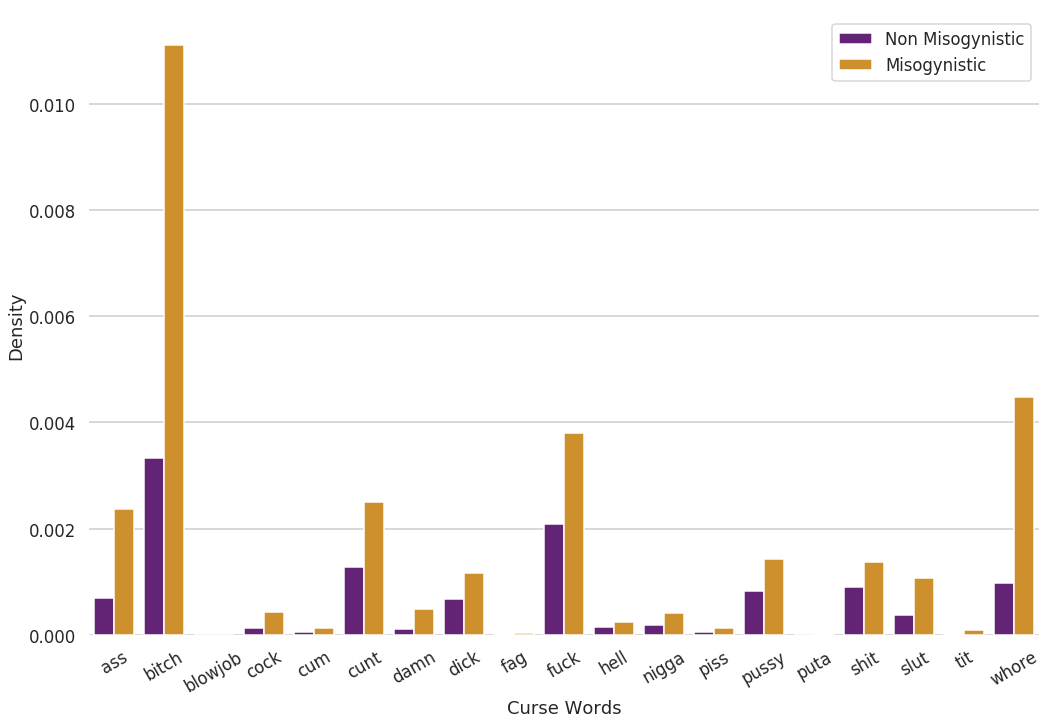

In [7]:
data['curse_words'] = data['text'].apply(helpers.density_of_curse_words_in_sentence)

misogynistic_curse_words = helpers.density_of_curse_words_in_total_corpus(data.loc[data.loc[:, 'label'] == 1], "Density")
misogynistic_curse_words['Misogynistic'] = "Misogynistic"

non_misogynistic_curse_words = helpers.density_of_curse_words_in_total_corpus(data.loc[data.loc[:, 'label'] == 0], "Density")
non_misogynistic_curse_words['Misogynistic'] = "Non Misogynistic"


df = pd.concat([non_misogynistic_curse_words,misogynistic_curse_words], axis=0)
df['Curse Words'] = df.index

sns.set_context("talk")
sns.set_style('whitegrid')
g = sns.catplot(x='Curse Words', y='Density', hue='Misogynistic', data=df, kind='bar', palette=sns.color_palette(["#6C1782", "#E99611"]), legend=False, size = 10,
                       aspect = 1.5,)
g.set_xticklabels(rotation=30)
g.despine(left=True, bottom = True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(fig_path+"curse_words_total_corpus.png")
plt.show()